In [93]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [94]:
Image_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPCOS=50

In [95]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size=(Image_SIZE,Image_SIZE),
    batch_size=BATCH_SIZE
)

Found 6870 files belonging to 6 classes.


In [96]:
class_names=dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy']

In [97]:
len(dataset)

215

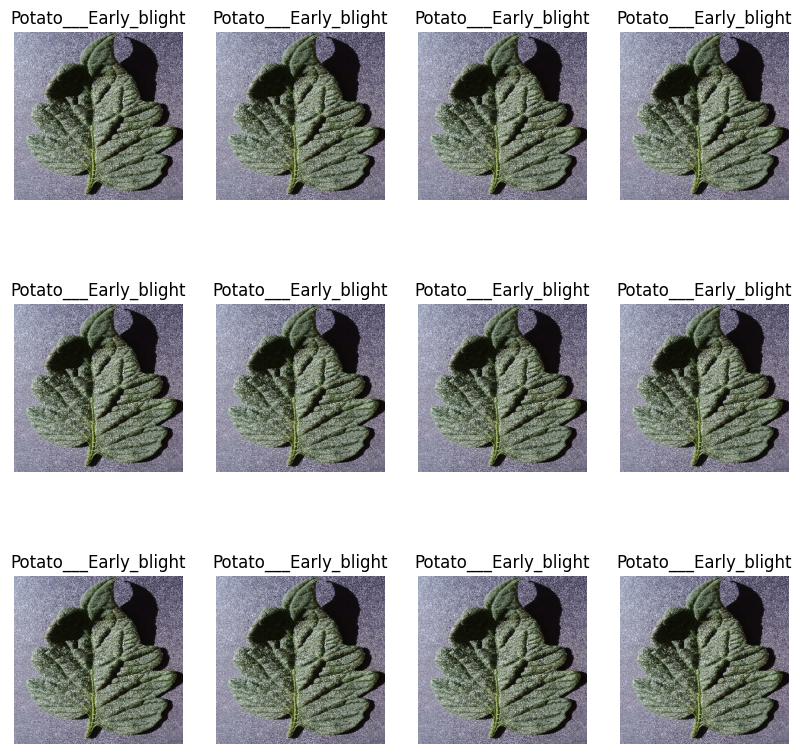

In [99]:
plt.figure(figsize=(10,10))
for image_batch,lable_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[12].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[0]])
        plt.axis("off")

In [116]:
tran_size=0.8
len(dataset)*tran_size

172.0

In [117]:
train_ds=dataset.take(172)

len(train_ds)

172

In [118]:
test_ds=dataset.skip(172)
len(test_ds)

43

In [119]:
val_size=0.1
len(dataset)*val_size

21.5

In [120]:
val_ds=test_ds.take(21)
len(val_ds)

21

In [121]:
test_ds=test_ds.skip(21)
len(test_ds)

22

In [122]:
len(train_ds)


172

In [123]:
len(val_ds)


21

In [124]:
len(test_ds)

22

In [125]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE    )

In [126]:
resize_and_rescale=tf.keras.Sequential([
   layers.Resizing(Image_SIZE, Image_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [127]:
data_augmentation=resize_and_rescale=tf.keras.Sequential([
   layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(1.0 / 255)
])

In [136]:
input_shape=(BATCH_SIZE,Image_SIZE,Image_SIZE,CHANNELS)
n_classes=6
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
 


    
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    
   
    
 
    
    layers.Flatten(),
    
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
    
    
    
])

model.build(input_shape=input_shape)

In [137]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_64 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_64 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_65 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_65 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (32, 60, 60, 64)        

In [138]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),

    metrics=['accuracy']
)

In [139]:
hstory=model.fit(
    train_ds,
    epochs=EPCOS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
172/172 [==============================] - 260s 1s/step - loss: 1.5499 - accuracy: 0.4800 - val_loss: 0.7860 - val_accuracy: 0.7158
Epoch 2/50
172/172 [==============================] - 560s 3s/step - loss: 0.6986 - accuracy: 0.7500 - val_loss: 1.3832 - val_accuracy: 0.5030
Epoch 3/50
172/172 [==============================] - 307s 2s/step - loss: 0.4719 - accuracy: 0.8408 - val_loss: 0.5156 - val_accuracy: 0.8199
Epoch 4/50
172/172 [==============================] - 454s 3s/step - loss: 0.3954 - accuracy: 0.8574 - val_loss: 0.3687 - val_accuracy: 0.8616
Epoch 5/50
172/172 [==============================] - 329s 2s/step - loss: 0.3275 - accuracy: 0.8810 - val_loss: 0.3741 - val_accuracy: 0.8497
Epoch 6/50
172/172 [==============================] - 7528s 44s/step - loss: 0.2859 - accuracy: 0.8993 - val_loss: 0.2448 - val_accuracy: 0.9196
Epoch 7/50
172/172 [==============================] - 371s 2s/step - loss: 0.2392 - accuracy: 0.9159 - val_loss: 0.4378 - val_accuracy: 0.83

KeyboardInterrupt: 

In [ ]:
acc = hstory.history['accuracy']
val_acc = hstory.history['val_accuracy']

loss = hstory.history['loss']
val_loss = hstory.history['val_loss']

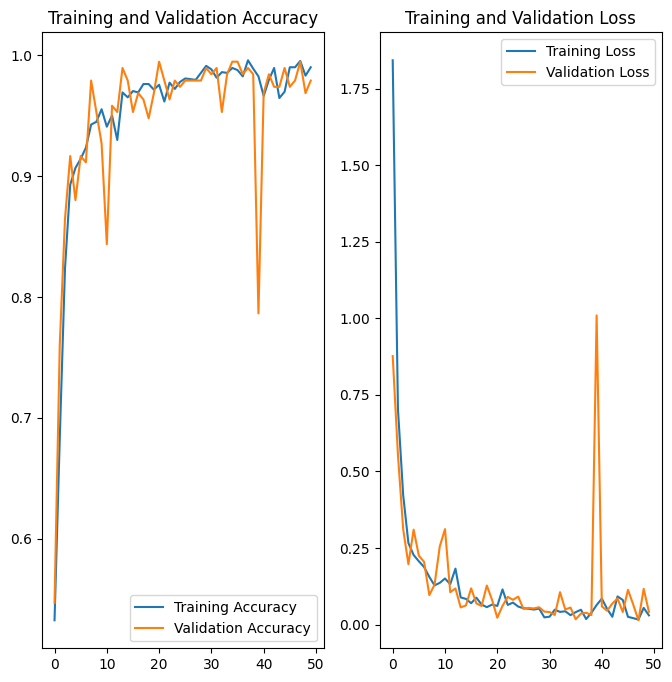

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPCOS), acc, label='Training Accuracy')
plt.plot(range(EPCOS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPCOS), loss, label='Training Loss')
plt.plot(range(EPCOS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 590ms/step
predicted label: Potato___Late_blight


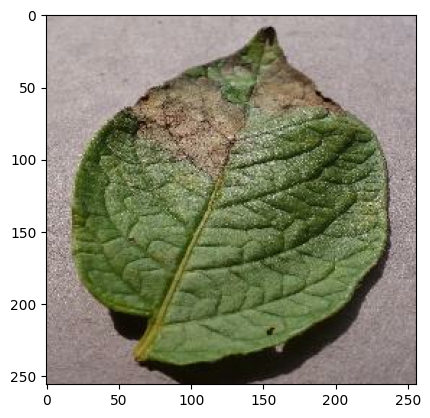

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 46ms/step


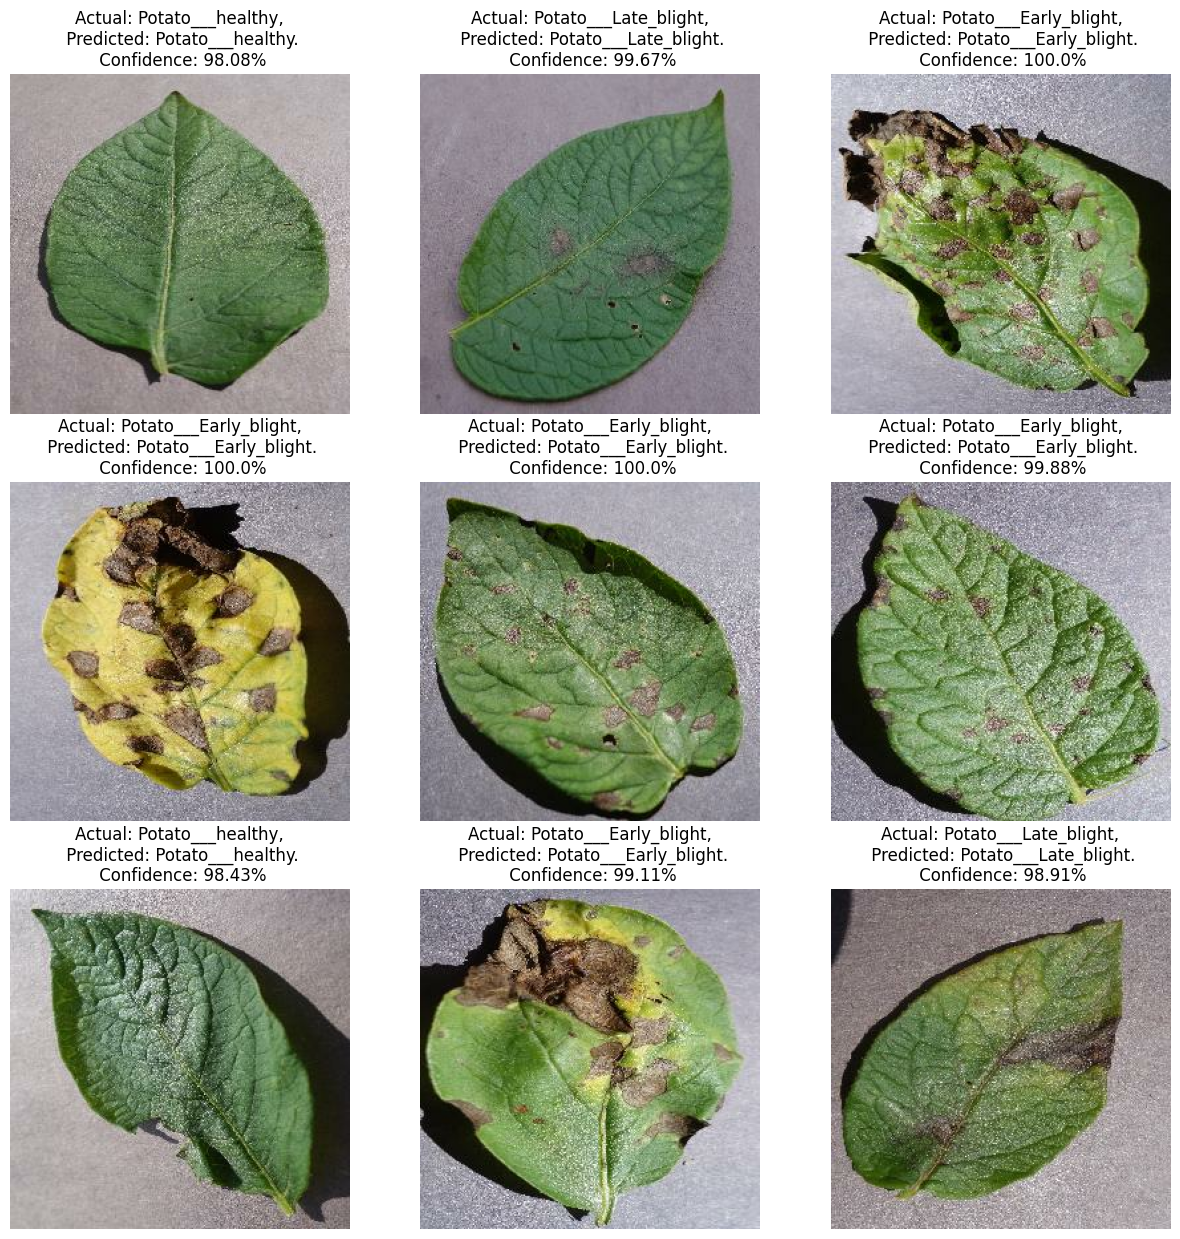

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model_version = 1
model.save(f"models/model_{model_version}.keras")

In [ ]:
model.save("potatoes.h5")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
score=model.evaluate(test_ds)

8/8 [==============================] - 3s 429ms/step - loss: 0.0410 - accuracy: 0.9784
